In [1]:
# Setup logging
from timeseria import logger
logger.setup(level='INFO')

# Set default plot type as image
import os
os.environ["DEFAULT_PLOT_TYPE"] = "image"

⚠️ In this notebook plots are set to be rendered in image format by default, as otherwise they will not be displayed on GitHub or when loading it (usually because not [trusted](https://stackoverflow.com/questions/44943646/jupyter-notebook-not-trusted)). To get interactive plots, remove the line above (or change it to "interactive") and re-run the notebook.


# A million points

This notebook showcase how Timeseria handles plotting of a timeseries with a million points.

In [2]:
import random
from timeseria.datastructures import DataTimePoint, TimeSeries

timeseries = TimeSeries()
print('Start generating data')
prev_data = 0
prev_t    = 1577836800
for i in range (0, 1000000):
    data = prev_data + random.randint(-10,10)/10.0
    t    = prev_t + 60
    if i % 200000 == 0:
        timeseries.append(DataTimePoint(t=t, data=[data*3])) # Add a spike
    else:
        timeseries.append(DataTimePoint(t=t, data=[data]))
    prev_data = data
    prev_t    = t
print('Done generating data')

Start generating data
Done generating data


In [3]:
print(timeseries)

Time series of #1000000 points at 1m resolution, from point @ 1577836860 (2020-01-01 00:01:00+00:00) to point @ 1637836800 (2021-11-25 10:40:00+00:00)


[INFO] timeseria.plots: Aggregating by "1000" for improved plotting


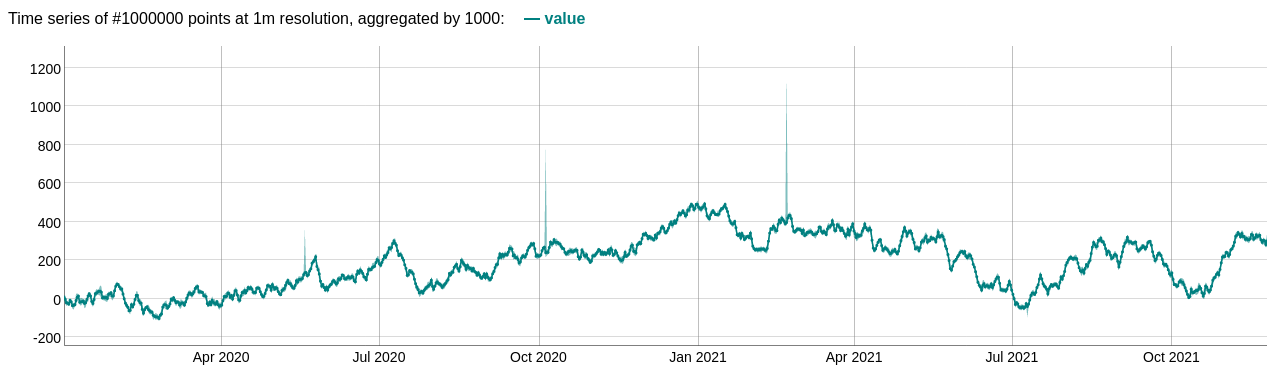

In [4]:
timeseries.plot()

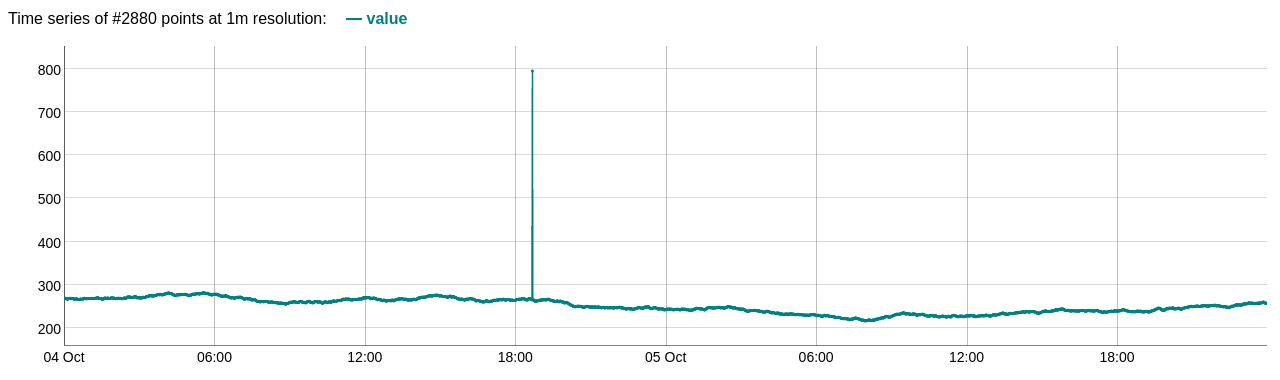

In [7]:
from timeseria.time import dt
timeseries.slice(from_dt=dt(2020,10,4),to_dt=dt(2020,10,6)).plot()